In [ ]:
# so we can use packages from parent directory
import sys
sys.path.append("..")

In [76]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as cols
import colorsys as cs
import pandas as pd
import numpy as np
import pickle
import nltk

data = pd.read_csv("filteredCorpus.csv")

colors = data[["clickColH", "clickColS", "clickColL", "alt1ColH", "alt1ColS", "alt1ColL", "alt2ColH", "alt2ColS", "alt2ColL", "contents"]]
hs = data["clickColH"]
ss = data["clickColS"]
ls = data["clickColL"]
print(colors.shape)
print(colors.head())
print(np.array(colors.loc[0,]))

In [137]:
data.shape

(57946, 36)

In [24]:
data[0:4].T

,0,1,2,3
gameid,1124-1,1124-1,1124-1,1124-1
clkTime,1.45988e+12,1.45988e+12,1.45988e+12,1.45988e+12
roundNum,1,2,3,3
condition,close,far,close,close
clickStatus,distr2,target,distr2,distr2
clickColH,248,249,291,291
clickColS,92,25,59,59
clickColL,50,50,50,50
clickLocS,3,1,3,3
clickLocL,1,2,3,3


In [51]:
class MonroeDataEntry():
    
    def __init__(self, k, raw_row):
        # format: [target, distr1, distr2]
        self.click_to_idx = {'target': 0, 'distr1':1, 'distr2':2}
        
        self.index = k
        self.colors = self.parse_colors(raw_row)
        self.caption = raw_row["contents"]
        self.tokens = nltk.word_tokenize(self.caption)
        self.target_idx = 0
        self.click_idx = self.click_to_idx[raw_row['clickStatus']]
        self.outcome = raw_row["outcome"]
        self.condition = raw_row["condition"]
    
    def _parse_color(self, raw_row, field):
        # get the dataframe keys by splitting a string - maintain HSL order
        color_ids = "{0}ColH {0}ColS {0}ColL {0}Status".format(field).split()
        color_vals = [raw_row[key] for key in color_ids]
        color = Color(*color_vals[:3])
        color_idx = self.click_to_idx[color_vals[-1]]
        return (color_idx, color)
            
    def parse_colors(self, raw_row):
        colors = [None, None, None]
        for field in ['click', 'alt1', 'alt2']:
            color_idx, color = self._parse_color(raw_row, field)
            colors[color_idx] = color
        return colors
    
    def __repr__(self):
        return self.caption

In [116]:
test_mde = MonroeDataEntry(data[0:1].values)

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [62]:
test_mde.colors[test_mde.target_idx]

hsl: [226, 50, 81], rgb [183, 194, 232]

In [26]:
"I am a {0}. {0}s say moo".format("cow")

'I am a cow. cows say moo'

In [33]:
a = [1, 2, 3, 4]

In [37]:
tuple(*a[:3])

TypeError: tuple() takes at most 1 argument (3 given)

In [34]:
sp_data = data[data["role"] == "speaker"]

In [11]:
sp_data.head()

,gameid,clkTime,roundNum,condition,clickStatus,clickColH,clickColS,clickColL,clickLocS,clickLocL,...,msgTime,role,contents,workerid_uniq,numOutcome,numRawWords,numRawChars,numCleanChars,numCleanWords,source
0,1124-1,1.459877e+12,1,close,distr2,248,92,50,3,1,...,1.459877e+12,speaker,The darker blue one,201.0,0.0,4,16,13.0,3.0,human
1,1124-1,1.459877e+12,2,far,target,249,25,50,1,2,...,1.459877e+12,speaker,purple,201.0,1.0,1,6,6.0,1.0,human
2,1124-1,1.459877e+12,3,close,distr2,291,59,50,3,3,...,1.459877e+12,speaker,Medium pink,201.0,0.0,2,10,10.0,2.0,human
3,1124-1,1.459877e+12,3,close,distr2,291,59,50,3,3,...,1.459877e+12,speaker,the medium dark one,201.0,0.0,4,16,13.0,3.0,human
4,1124-1,1.459877e+12,4,split,distr1,85,21,50,2,1,...,1.459877e+12,speaker,lime,201.0,0.0,1,4,4.0,1.0,human


In [57]:
%%time
combination_contents = sp_data.groupby(['gameid', 'roundNum'])['contents'].transform(' '.join)

CPU times: user 7.97 s, sys: 105 ms, total: 8.08 s
Wall time: 8.1 s


In [64]:
sp_data['contents'] = combination_contents

/Users/benjaminnewman/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [67]:
max_msg_times = sp_data.groupby(['gameid', 'roundNum']).msgTime.transform(max)

In [69]:
sp_data = sp_data.loc[max_msg_times == sp_data.msgTime]

In [71]:
sp_data.head()

,gameid,clkTime,roundNum,condition,clickStatus,clickColH,clickColS,clickColL,clickLocS,clickLocL,...,msgTime,role,contents,workerid_uniq,numOutcome,numRawWords,numRawChars,numCleanChars,numCleanWords,source
0,1124-1,1.459877e+12,1,close,distr2,248,92,50,3,1,...,1.459877e+12,speaker,The darker blue one,201.0,0.0,4,16,13.0,3.0,human
1,1124-1,1.459877e+12,2,far,target,249,25,50,1,2,...,1.459877e+12,speaker,purple,201.0,1.0,1,6,6.0,1.0,human
3,1124-1,1.459877e+12,3,close,distr2,291,59,50,3,3,...,1.459877e+12,speaker,Medium pink the medium dark one,201.0,0.0,4,16,13.0,3.0,human
4,1124-1,1.459877e+12,4,split,distr1,85,21,50,2,1,...,1.459877e+12,speaker,lime,201.0,0.0,1,4,4.0,1.0,human
5,1124-1,1.459877e+12,5,far,target,156,84,50,1,3,...,1.459877e+12,speaker,Mint green.,201.0,1.0,2,9,9.0,2.0,human


In [47]:
sp_data.shape

(53365, 36)

In [38]:
sp_data.head()

,gameid,clkTime,roundNum,condition,clickStatus,clickColH,clickColS,clickColL,clickLocS,clickLocL,...,msgTime,role,contents,workerid_uniq,numOutcome,numRawWords,numRawChars,numCleanChars,numCleanWords,source
0,1124-1,1.459877e+12,1,close,distr2,248,92,50,3,1,...,1.459877e+12,speaker,The darker blue one,201.0,0.0,4,16,13.0,3.0,human
1,1124-1,1.459877e+12,2,far,target,249,25,50,1,2,...,1.459877e+12,speaker,purple,201.0,1.0,1,6,6.0,1.0,human
2,1124-1,1.459877e+12,3,close,distr2,291,59,50,3,3,...,1.459877e+12,speaker,Medium pink,201.0,0.0,2,10,10.0,2.0,human
3,1124-1,1.459877e+12,3,close,distr2,291,59,50,3,3,...,1.459877e+12,speaker,the medium dark one,201.0,0.0,4,16,13.0,3.0,human
4,1124-1,1.459877e+12,4,split,distr1,85,21,50,2,1,...,1.459877e+12,speaker,lime,201.0,0.0,1,4,4.0,1.0,human


In [154]:
class MonroeData():
    
    def __init__(self, filename, single_speaker=True, ss_method="pool"):
        """
        MonroeData allows for storage, access, and display of data from the Monroe et al
        color experiments. Each csv row is stored in a MonroeDataEntry object and MonroeData
        stores a python list of these objects as well as the underlying dataframe.
        """
        self.data = pd.read_csv(filename)
        if single_speaker:
            
            if ss_method == "final":
                # filter out all the listener utterances and keep the
                # last speaker utterance (hopefully it is most relevant)
                data = self.data[self.data["role"] == "speaker"]
                max_msg_times = data.groupby(['gameid', 'roundNum']).msgTime.transform(max)
                self.data = data.loc[max_msg_times == data.msgTime]
                # reset index so indices line up with entries list
                self.data.reset_index(drop=True, inplace=True)
            elif ss_method == "pool":
                # filter out listener utterances and concatenate speaker utterances
                data = self.data[self.data["role"] == "speaker"]
                pool_msg_times = data.groupby(['gameid', 'roundNum'])
                # when we concatenate rows, do so with a tilde character: 
                # b/c monroe does it here:
                # https://github.com/futurulus/colors-in-context/blob/2e7b830668cd039830154e7e8f211c6d4415d30f/color_instances.py#L581
                concat_rows = data.groupby(['gameid', 'roundNum']).contents.transform(' ~ '.join)
                data['contents'] = concat_rows
                # arbitrarily take largest message time to get rid of duplicates
                max_msg_times = data.groupby(['gameid', 'roundNum']).msgTime.transform(max)
                self.data = data.loc[max_msg_times == data.msgTime]
                self.data.reset_index(drop=True, inplace=True)
        
        self.entries = []
        
    def read_data(self):
        for k, row in self.data.iterrows():
            self.entries.append(MonroeDataEntry(k, row))
            yield self.entries[-1]
    
    def display_target(self, color, caption):
        """
        color is normalized rgb (i.e. all values between 0 and 1) - see Color class for implementation
        caption is string displayed with image
        
        Displays the color in a rectangle with the caption above it
        """
        fig = plt.figure()
        ax = fig.add_subplot(111)
        target_rect = matplotlib.patches.Rectangle((0,0), 800, 800, facecolor=color, edgecolor="black")
        
        ax.add_patch(target_rect)
        ax.set_yticks([])
        ax.set_xticks([])
        print(caption)
        plt.show()

        
    def display_game_for_gameid(self, game_id, round_num = None):
        df_indices = []
        round_num_list = []
        if round_num is None:
            # add all the indices!
            round_num_list = self.data[self.data['gameid'] == game_id].roundNum.unique()
        elif isinstance(round_num, list):
            round_num_list = round_num
        else:
            # round_nums is a single integer, so we just convert it to a list
            round_num_list = [round_num]
        
        
        for round_num in round_num_list:
            df_indices.extend(
                self.data[(self.data['gameid'] == game_id) & (self.data['roundNum'] == round_num)].index.values
            )
        
        for i in df_indices:
            self.display_game(i)
        
    
    def display_target_for_idx(self, row_index):
        """
        Displays just the target color and caption for the entry at the given index
        """
        data_entry = self.entries[row_index]
        self.display_target(data_entry.colors[data_entry.target_idx].rgb_norm, data_entry.caption)
    
    def display_game(self, row_index):
        """
        Takes an index and displays an annotated version of the game.
        Target color is on left
        Clicked color is outlined in red
        """
        data_entry = self.entries[row_index]        
        bottom_corners = [(-600,-400), (-200,-400), (200,-400)]
        width = 400
        height = 800
        
        # generate rectangles with their colors
        color_rects = []
        for i, corner in enumerate(bottom_corners):
            # target color will always be on left, we want clicked color
            # to stand out with a thick (linewidth=5), red outline that is
            # at the top of the rectangle stack (zorder = 5) displayed
            outline_color, stack_order, line_width =\
                ("red", 5, 5) if i == data_entry.click_idx else ("black", 0, None)
            color_rects.append(matplotlib.patches.Rectangle(corner, width, height,
                                                            facecolor=data_entry.colors[i].rgb_norm, 
                                                            edgecolor=outline_color,
                                                            zorder = stack_order,
                                                            linewidth=line_width))
        # add rectangles to figures
        fig = plt.figure()
        ax = fig.add_subplot(111)
        for rect in color_rects:
            ax.add_patch(rect)

        # hide axis labels
        ax.set_yticks([])
        ax.set_xticks([])
        
        # display caption and game
        print("{}) Game: {} Round: {}\n{}".format(row_index, self.data.iloc[row_index]['gameid'],
                                                          self.data.iloc[row_index]['roundNum'], data_entry.caption))
        plt.xlim([-600, 600])
        plt.ylim([-400, 400])
        plt.show()
    
    def __getitem__(self, key):
        return self.entries[key]
    
    def __len__(self):
        return len(self.entries)


In [376]:
md_test.data[md_test.data['gameid'] == "8235-6"].roundNum.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])

In [152]:
%%time
md_test_small = MonroeData("filteredCorpus.csv", single_speaker=True)

CPU times: user 8.74 s, sys: 936 ms, total: 9.68 s
Wall time: 10.6 s


/Users/benjaminnewman/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [153]:
md_test_small.data.head()

,gameid,clkTime,roundNum,condition,clickStatus,clickColH,clickColS,clickColL,clickLocS,clickLocL,...,msgTime,role,contents,workerid_uniq,numOutcome,numRawWords,numRawChars,numCleanChars,numCleanWords,source
0,1124-1,1.459877e+12,1,close,distr2,248,92,50,3,1,...,1.459877e+12,speaker,The darker blue one,201.0,0.0,4,16,13.0,3.0,human
1,1124-1,1.459877e+12,2,far,target,249,25,50,1,2,...,1.459877e+12,speaker,purple,201.0,1.0,1,6,6.0,1.0,human
2,1124-1,1.459877e+12,3,close,distr2,291,59,50,3,3,...,1.459877e+12,speaker,Medium pink ~ the medium dark one,201.0,0.0,4,16,13.0,3.0,human
3,1124-1,1.459877e+12,4,split,distr1,85,21,50,2,1,...,1.459877e+12,speaker,lime,201.0,0.0,1,4,4.0,1.0,human
4,1124-1,1.459877e+12,5,far,target,156,84,50,1,3,...,1.459877e+12,speaker,Mint green.,201.0,1.0,2,9,9.0,2.0,human


In [481]:
for i in md_test_small.read_data():
    pass

33) Game: 1124-1 Round: 34
Hahaha. Me too. This one is purple. Not neon and not lavender


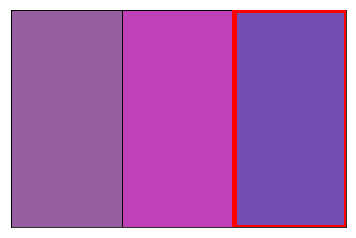

In [477]:
md_test_small.display_game(33)

49) Game: 8235-6 Round: 1
select the bright green, not the olive


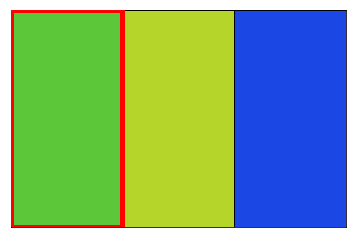

50) Game: 8235-6 Round: 2
green


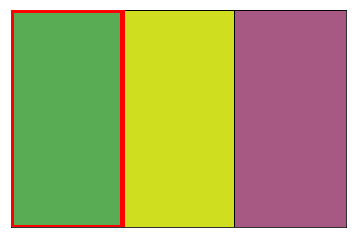

51) Game: 8235-6 Round: 3
red


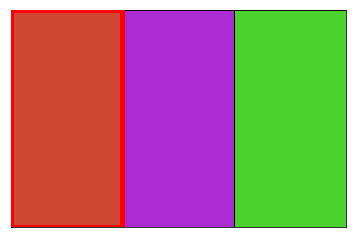

52) Game: 8235-6 Round: 4
grey


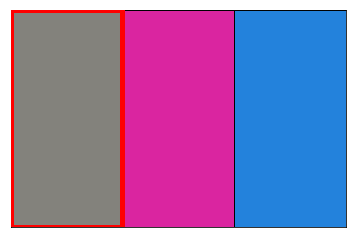

53) Game: 8235-6 Round: 5
brownish-cream; not grey or pinkish


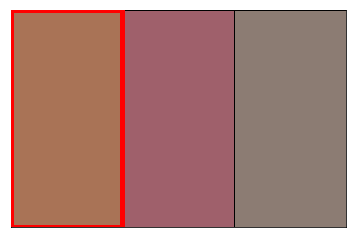

54) Game: 8235-6 Round: 6
blue


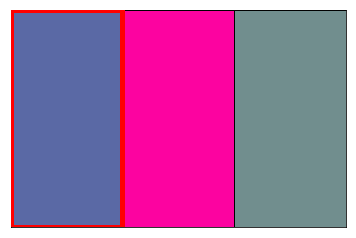

55) Game: 8235-6 Round: 7
grey (you're doing great)


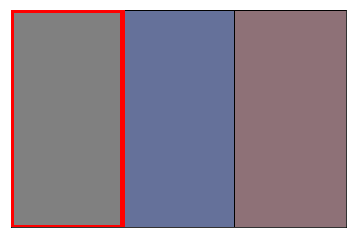

56) Game: 8235-6 Round: 8
teal (not the two that are more green)


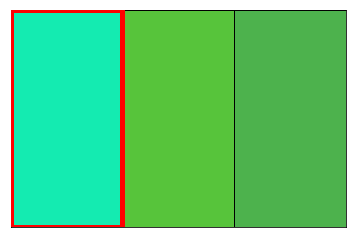

57) Game: 8235-6 Round: 9
brownish


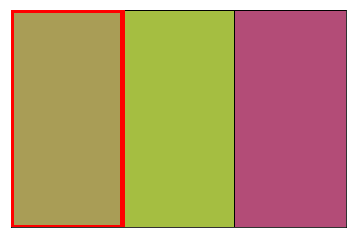

58) Game: 8235-6 Round: 11
the bright green


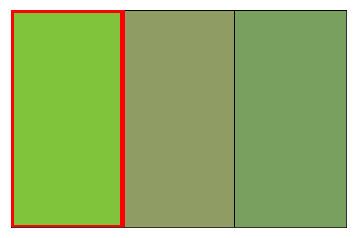

59) Game: 8235-6 Round: 12
brownish


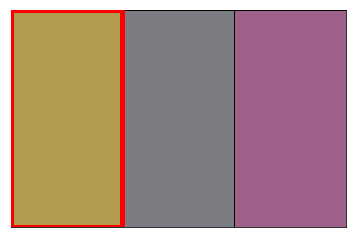

60) Game: 8235-6 Round: 13
reddish


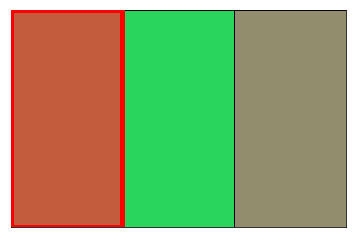

61) Game: 8235-6 Round: 14
grey


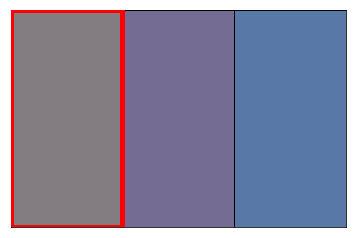

62) Game: 8235-6 Round: 15
dark blue


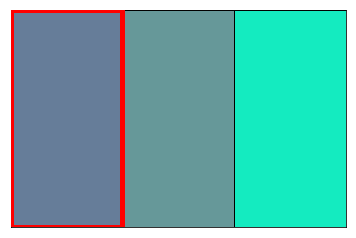

63) Game: 8235-6 Round: 16
purple


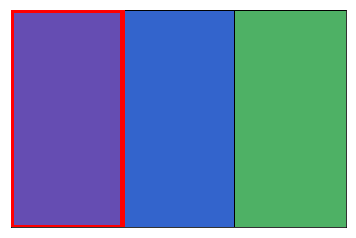

64) Game: 8235-6 Round: 17
dark pink; not bright pink


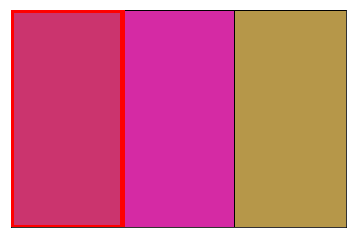

65) Game: 8235-6 Round: 18
brightest green


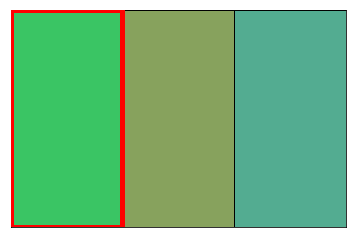

66) Game: 8235-6 Round: 19
brightest green


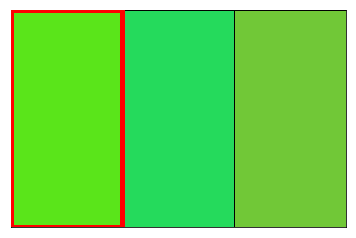

67) Game: 8235-6 Round: 20
dark purple (good job on the last two, by the way)


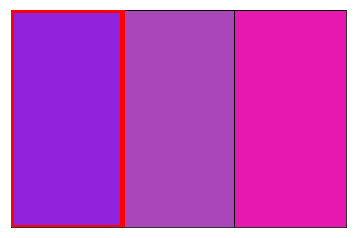

68) Game: 8235-6 Round: 21
dark orange (not the red, and not the lighter orange)


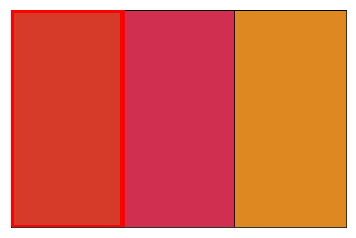

69) Game: 8235-6 Round: 22
purple; not pink or teal (good on the last one)


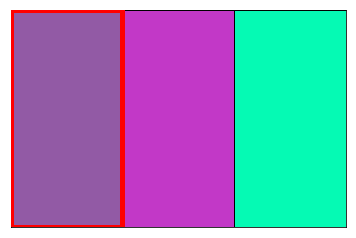

70) Game: 8235-6 Round: 23
darkest green


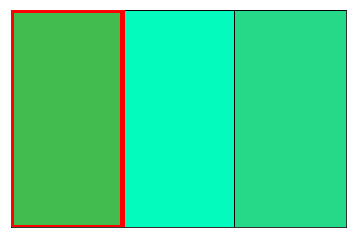

71) Game: 8235-6 Round: 24
brightest pink


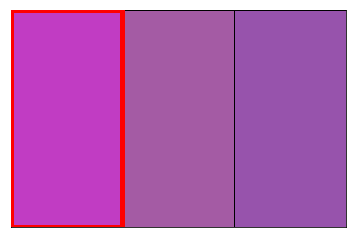

72) Game: 8235-6 Round: 25
grey; not grey-brown or red


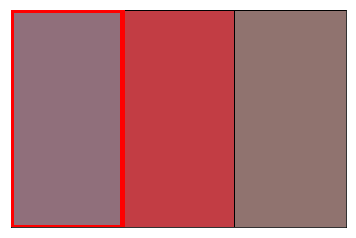

73) Game: 8235-6 Round: 26
grey-green


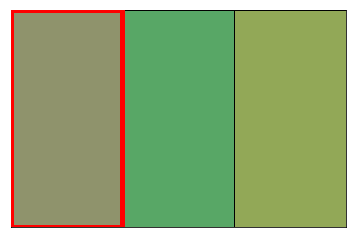

74) Game: 8235-6 Round: 27
grey-purple


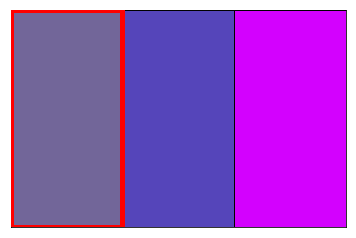

75) Game: 8235-6 Round: 28
olive (not teal or bright green)


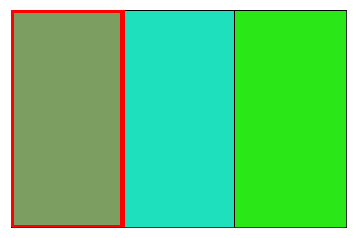

76) Game: 8235-6 Round: 29
bright blue (not one with hint of purple)


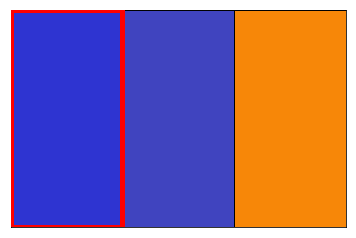

77) Game: 8235-6 Round: 30
grey


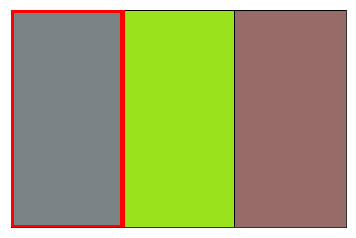

78) Game: 8235-6 Round: 31
dull purple


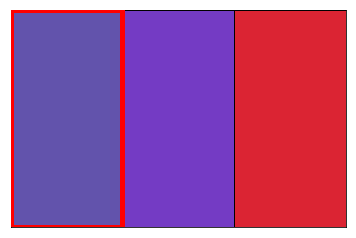

79) Game: 8235-6 Round: 32
teal


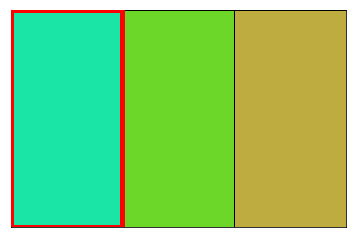

80) Game: 8235-6 Round: 33
olive


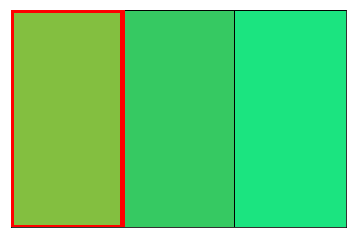

81) Game: 8235-6 Round: 34
green, but not neon green


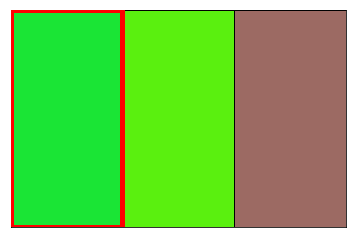

82) Game: 8235-6 Round: 35
grey-teal (good on the last one)


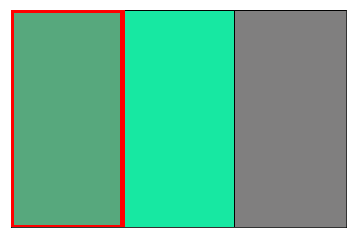

83) Game: 8235-6 Round: 36
orange


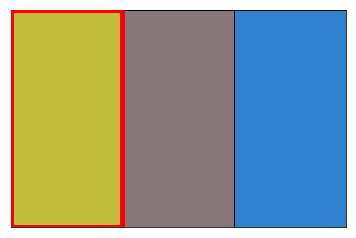

84) Game: 8235-6 Round: 37
grey


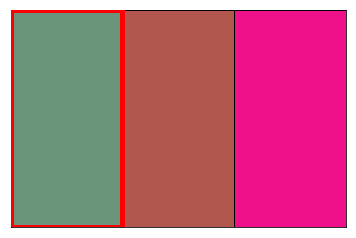

85) Game: 8235-6 Round: 38
grey-blue


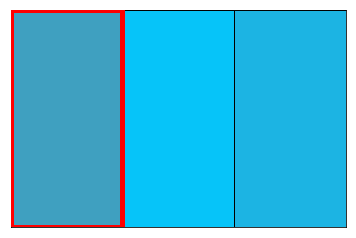

86) Game: 8235-6 Round: 39
green


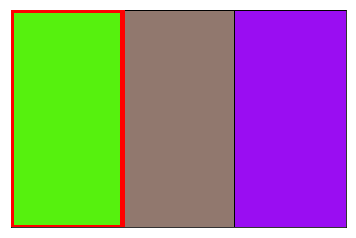

87) Game: 8235-6 Round: 40
darkest green


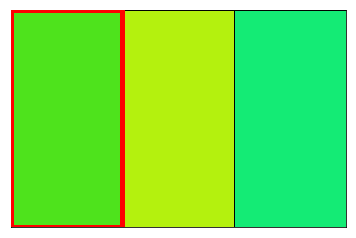

88) Game: 8235-6 Round: 41
pink


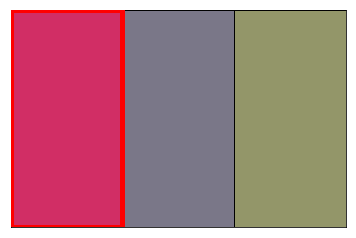

89) Game: 8235-6 Round: 42
yellow


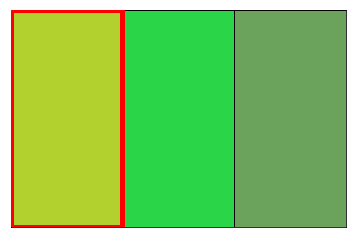

90) Game: 8235-6 Round: 43
purple


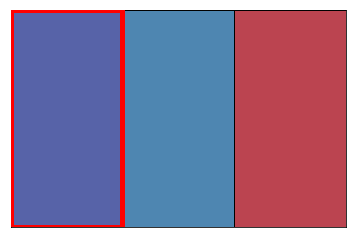

91) Game: 8235-6 Round: 44
green


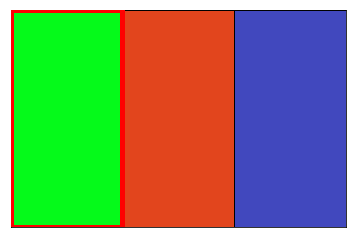

92) Game: 8235-6 Round: 45
red


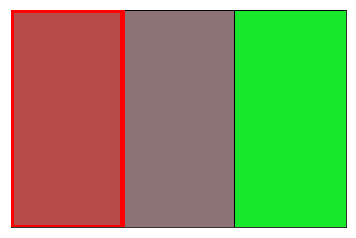

93) Game: 8235-6 Round: 46
purple


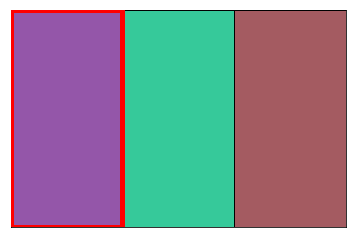

94) Game: 8235-6 Round: 47
darker grey (not the lighter green-grey)


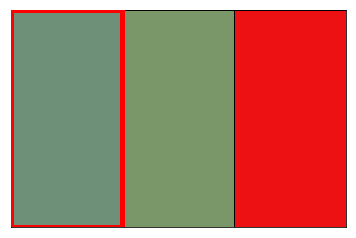

95) Game: 8235-6 Round: 48
normal grey


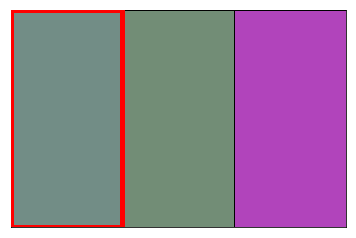

96) Game: 8235-6 Round: 49
orange


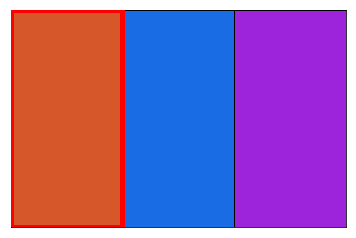

97) Game: 8235-6 Round: 50
green (nice job!  I think we got one wrong.  nice working with you)


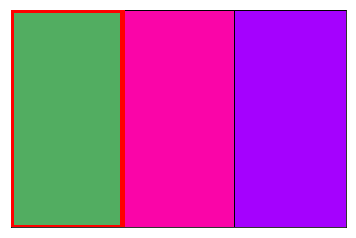

In [484]:
md_test_small.display_game_for_gameid("8235-6")

In [420]:
md_test_small_nos = MonroeData("filteredCorpus.csv", single_speaker=False)

In [421]:
for i in md_test_small_nos.read_data():
    pass

hi
[39, 40]
39 I like the weirder one


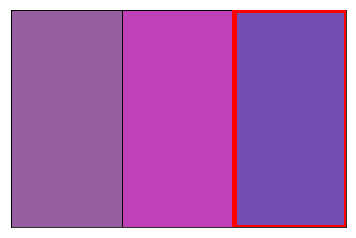

40 Hahaha. Me too. This one is purple. Not neon and not lavender


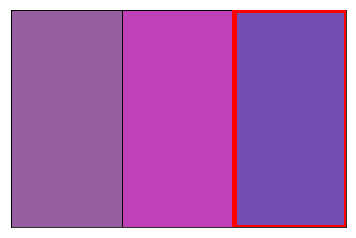

In [422]:
md_test_small_nos.display_game_for_gameid("1124-1", 34)

In [442]:
md_test_small.data.reset_index(drop=True, inplace=True)

In [467]:
md_test_small.data[:100].tail()

,gameid,clkTime,roundNum,condition,clickStatus,clickColH,clickColS,clickColL,clickLocS,clickLocL,...,msgTime,role,contents,workerid_uniq,numOutcome,numRawWords,numRawChars,numCleanChars,numCleanWords,source
95,8235-6,1.459878e+12,48,split,target,164,11,50,3,2,...,1.459878e+12,speaker,normal grey,968.0,1.0,2,10,10.0,2.0,human
96,8235-6,1.459878e+12,49,far,target,16,68,50,2,1,...,1.459878e+12,speaker,orange,968.0,1.0,1,6,6.0,1.0,human
97,8235-6,1.459878e+12,50,far,target,130,36,50,2,1,...,1.459878e+12,speaker,green (nice job! I think we got one wrong. n...,968.0,1.0,13,49,39.0,9.0,human
98,2007-2,1.459877e+12,1,split,target,96,79,50,2,3,...,1.459877e+12,speaker,lime green,963.0,1.0,2,9,9.0,2.0,human
99,2007-2,1.459877e+12,2,close,target,191,3,50,1,3,...,1.459877e+12,speaker,gray,963.0,1.0,1,4,4.0,1.0,human


In [412]:
len(md_test_small)

0

In [258]:
%%time
counter = 0
for data_entry in md_test.read_data():
    counter += 1

CPU times: user 3min 13s, sys: 1.35 s, total: 3min 15s
Wall time: 3min 15s


###### data.shape

In [219]:
md_test[2].colors == md_test[3].colors

True

In [250]:
md_test.data[98:101].T

,98,99,100
gameid,8235-6,8235-6,8235-6
clkTime,1.45988e+12,1.45988e+12,1.45988e+12
roundNum,41,42,43
condition,far,close,split
clickStatus,target,target,target
clickColH,340,71,231
clickColS,64,64,32
clickColL,50,50,50
clickLocS,2,3,3
clickLocL,1,2,1


In [166]:
md_test[2].colors[0].rgb == md_test[3].colors[0].rgb

True

3 the medium dark one


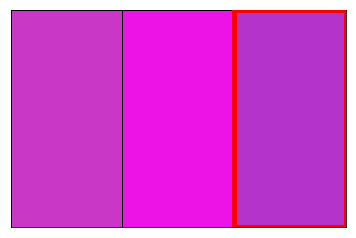

In [222]:
md_test.display_game(3)

Darkish red


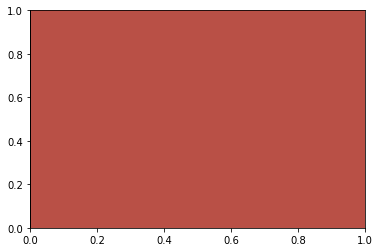

In [180]:
md_test.display_target_for_idx(9)

In [88]:
print(list(nltk.word_tokenize(md_test[i].caption) for i in range(len(md_test.entries))))

[['The', 'darker', 'blue', 'one'], ['purple'], ['Medium', 'pink'], ['the', 'medium', 'dark', 'one'], ['lime'], ['Mint', 'green', '.'], ['Mud', 'brown'], ['Mud', 'brown'], ['Camo', 'green'], ['Darkish', 'red']]


In [173]:
class Color():
    def __init__(self, coordinate_1, coordinate_2, coordinate_3, space='hsl'):
        if space.lower() == 'hsl':
            self.hsl = [coordinate_1, coordinate_2, coordinate_3]
            self.rgb = self.hsl_to_rgb(self.hsl)
            
        if space.lower() == "rgb":
            self.rgb = [coordinate_1, coordinate_2, coordinate_3]
            self.hsl = self.rgb_to_hsl(self.rgb)
        
        self.hsv = self.hsl_to_hsv(self.hsl)
        
        self.hsl_norm = self.normalize_hsl(self.hsl)
        self.rgb_norm = self.normalize_rgb(self.rgb)
        self.hsv_norm = self.normalize_hsv(self.hsv)
    
    def normalize_hsl(self, hsl):
        norm_circle = cols.Normalize(0, 360)
        norm_hundred = cols.Normalize(0, 100)
        return [norm_circle(hsl[0]), norm_hundred(hsl[1]), norm_hundred(hsl[2])]
    
    def normalize_rgb(self, rgb):
        norm_byte = cols.Normalize(0, 256)
        norm_color = [norm_byte(c) for c in rgb]
        return norm_color
    
    def normalize_hsv(self, hsv):
        norm_circle = cols.Normalize(0, 360)
        norm_hundred = cols.Normalize(0, 100)
        return [norm_circle(hsv[0]), norm_hundred(hsv[1]), norm_hundred(hsv[2])]
    
    def rgb_to_hsl(self, rgb):
        norm_color = self.normalize_rgb(rgb)
        hls = cs.rgb_to_hls(*norm_color)
        hsl = [int(round(360*hls[0])), round(100*hls[2]), round(100*hls[1])]
        return hsl
    
    def hsl_to_rgb(self, hsl):
        # colorsys package takes colors in hls not hsl, so we swap the last two columns here.
        norm_color = self.normalize_hsl(hsl)
        norm_color[1], norm_color[2] = norm_color[2], norm_color[1]
        rgb = cs.hls_to_rgb(norm_color[0], norm_color[1], norm_color[2])
        rgb = [int(round(c*256)) for c in rgb]
        return rgb
    
    def hsl_to_hsv(self, hsl):
        # shamelessly taken from Will Monroes code and he based his code off of
        #   http://ariya.ofilabs.com/2008/07/converting-between-hsl-and-hsv.html
        h_in, s_in, l_in = hsl
        h_out = h_in
        s_in *= (l_in/100.0) if l_in <= 50.0 else (1.0 - (l_in/100.0))
        v_out = l_in + s_in
        s_out = (200.0 * s_in / v_out) if v_out else 0.0
        return [h_out, s_out, v_out]
        
        
    
    def __repr__(self):
        return 'hsl: {}, rgb {}, hsv {}'.format(self.hsl, self.rgb, self.hsv)
    
    def __eq__(self, other):
        return other.hsl == self.hsl and other.rgb == self.rgb
            
    
            
    

In [168]:
test_color = Color(120, 100, 50)

In [171]:
test_color.hsl_to_hsv([240, 100, 0])

[240, 0.0, 0.0]

In [ ]:
# HSL <-> HSV conversion based on C code by Ariya Hidayat:
#   http://ariya.ofilabs.com/2008/07/converting-between-hsl-and-hsv.html
def hsl_to_hsv(color):
'''
    >>> hsl_to_hsv((120, 100, 50))
    (120.0, 100.0, 100.0)
    >>> hsl_to_hsv((0, 100, 100))
    (0.0, 0.0, 100.0)
    Saturation in HSV is undefined and arbitrarily 0 for black:
    >>> hsl_to_hsv((240, 100, 0))
    (240.0, 0.0, 0.0)
    '''
    hi, si, li = [float(d) for d in color]
    ho = hi
    si *= (li / 100.0) if li <= 50.0 else (1.0 - li / 100.0)
    vo = li + si
    so = (200.0 * si / vo) if vo else 0.0
return (ho, so, vo)
def hsv_to_hsl(color):
'''
    >>> hsv_to_hsl((120, 100, 100))
    (120.0, 100.0, 50.0)
    Saturation in HSL is undefined and arbitrarily 0 for black and white:
    >>> hsv_to_hsl((240, 0, 0))
    (240.0, 0.0, 0.0)
    >>> hsv_to_hsl((0, 0, 100))
    (0.0, 0.0, 100.0)
    '''
    hi, si, vi = [float(d) for d in color]
    ho = hi
    lo = (200.0 - si) * vi / 200.0
    so = si * vi / 200.0
if lo >= 100.0 or lo <= 0.0:
        so = 0.0
else:
        so /= (lo / 100.0) if lo <= 50.0 else (1.0 - lo / 100.0)
return (ho, so, lo)

In [144]:
# Let's make a simple model to try and predict condition from words

len(md_test)

NameError: name 'md_test' is not defined

In [226]:
from collections import Counter
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing import LabelEncoder



In [227]:
def bow_phi(data_entry):
    features = Counter()
    for word in data_entry.tokens:
        features[word] += 1
    return features
        

In [265]:

def get_features(phi, data, num_test=100):
    vectorizer = DictVectorizer()
    features = [phi(de) for de in data.entries]
    features = vectorizer.fit_transform(features)
    features_train = features[num_test:]
    features_test = features[:num_test]
    return features_train, features_test

def get_targets(data, num_test=100):
    targets = [de.condition for de in data.entries]
    target_encoder = LabelEncoder()
    target_encoder.fit(targets)
    targets_enc = target_encoder.transform(targets)
    targets_train = targets_enc[num_test:]
    targets_test = targets_enc[:num_test]
    return targets_train, targets_test

def fit_and_evaluate(model, features_train, features_test, targets_train, targets_test):
    clf = model.fit(features_train, targets_train)
    model_acc = clf.score(features_test, targets_test)
    print("Accuracy: {}".format(model_acc))
    return clf, model_acc
    


In [266]:
def logisitc_regression_model(data, phi):
    features_train, features_test = get_features(phi, data, num_test=500)
    targets_train, targets_test = get_targets(data, num_test = 500)
    model = LogisticRegression(fit_intercept=True, solver='newton-cg', multi_class='multinomial')
    model = fit_and_evaluate(model, features_train, features_test, targets_train, targets_test)
    return model

In [267]:
logisitic_model = logisitc_regression_model(md_test, bow_phi)

Accuracy: 0.48


In [489]:
logistic_model_speaker = logisitc_regression_model(md_speaker, bow_phi)

Accuracy: 0.508


In [487]:
%%time
md_speaker = MonroeData("filteredCorpus.csv", ss_method="final")
for _ in md_speaker.read_data(): pass

CPU times: user 3min 7s, sys: 2.17 s, total: 3min 9s
Wall time: 3min 38s


In [ ]:
import pickle

with open("monroe_speaker_data.pkl", "wb") as pkl_file:
    pickle.dump(md_speaker.entries, pkl_file)

In [160]:
%%time
# produces a warning, but still works
md_speaker_pool = MonroeData("filteredCorpus.csv", ss_method="pool")
#for _ in md_speaker_pool.read_data(): pass

/Users/benjaminnewman/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


CPU times: user 8.16 s, sys: 170 ms, total: 8.33 s
Wall time: 8.47 s


In [161]:
md_speaker_pool.data.head()

,gameid,clkTime,roundNum,condition,clickStatus,clickColH,clickColS,clickColL,clickLocS,clickLocL,...,msgTime,role,contents,workerid_uniq,numOutcome,numRawWords,numRawChars,numCleanChars,numCleanWords,source
0,1124-1,1.459877e+12,1,close,distr2,248,92,50,3,1,...,1.459877e+12,speaker,The darker blue one,201.0,0.0,4,16,13.0,3.0,human
1,1124-1,1.459877e+12,2,far,target,249,25,50,1,2,...,1.459877e+12,speaker,purple,201.0,1.0,1,6,6.0,1.0,human
2,1124-1,1.459877e+12,3,close,distr2,291,59,50,3,3,...,1.459877e+12,speaker,Medium pink ~ the medium dark one,201.0,0.0,4,16,13.0,3.0,human
3,1124-1,1.459877e+12,4,split,distr1,85,21,50,2,1,...,1.459877e+12,speaker,lime,201.0,0.0,1,4,4.0,1.0,human
4,1124-1,1.459877e+12,5,far,target,156,84,50,1,3,...,1.459877e+12,speaker,Mint green.,201.0,1.0,2,9,9.0,2.0,human


In [78]:
%%time
for _ in md_speaker_pool.read_data(): pass

CPU times: user 2min 38s, sys: 1.27 s, total: 2min 39s
Wall time: 2min 38s


In [136]:
num_train + num_dev + num_test

46994

In [155]:
# perform random train-dev-test split
# actually... is not random (This feels like bad practice, but I'm not sure - we can certainly try)
# from Monroe et al., 2017 paper
# https://github.com/futurulus/colors-in-context/blob/2e7b830668cd039830154e7e8f211c6d4415d30f/color_instances.py#L536

# train: 1124-1:1  (start) - 8994-5:50
# dev:   2641-2:1          - 8574-6:50
# test:  5913-4:1          - 8452-5:50 (end)
#
# Training contexts: 15615
# Dev contexts: 15720
# Test contexts: 15659

num_train = 15665
num_dev = 15670
num_test = 15659

perm_indices = list(range(len(md_speaker_pool)))
#np.random.shuffle(perm_indices)

In [162]:
train_df = pd.DataFrame(index = list(range(num_train)), columns=md_speaker_pool.data.columns)
dev_df = pd.DataFrame(index = list(range(num_dev)), columns=md_speaker_pool.data.columns)
test_df = pd.DataFrame(index = list(range(num_test)), columns=md_speaker_pool.data.columns)

In [163]:
train_i = 0
dev_i   = 0
test_i  = 0
for i, row in md_speaker_pool.data.iterrows():
    if perm_indices[i] < num_train: # training
        train_df.loc[train_i] = row
        train_i += 1
    elif perm_indices[i] < num_train + num_dev: # dev
        dev_df.loc[dev_i] = row
        dev_i += 1
    else: # test
        test_df.loc[test_i] = row
        test_i += 1
        

In [164]:
train_df.to_csv("train_corpus_monroe.csv", index=False)
dev_df.to_csv("dev_corpus_monroe.csv", index=False)
test_df.to_csv("test_corpus_monroe.csv", index=False)

In [165]:
train_df.head()

,gameid,clkTime,roundNum,condition,clickStatus,clickColH,clickColS,clickColL,clickLocS,clickLocL,...,msgTime,role,contents,workerid_uniq,numOutcome,numRawWords,numRawChars,numCleanChars,numCleanWords,source
0,1124-1,1.45988e+12,1,close,distr2,248,92,50,3,1,...,1.45988e+12,speaker,The darker blue one,201,0,4,16,13,3,human
1,1124-1,1.45988e+12,2,far,target,249,25,50,1,2,...,1.45988e+12,speaker,purple,201,1,1,6,6,1,human
2,1124-1,1.45988e+12,3,close,distr2,291,59,50,3,3,...,1.45988e+12,speaker,Medium pink ~ the medium dark one,201,0,4,16,13,3,human
3,1124-1,1.45988e+12,4,split,distr1,85,21,50,2,1,...,1.45988e+12,speaker,lime,201,0,1,4,4,1,human
4,1124-1,1.45988e+12,5,far,target,156,84,50,1,3,...,1.45988e+12,speaker,Mint green.,201,1,2,9,9,2,human


In [132]:
dev_data = MonroeData("test_corpus.csv")

In [135]:
dev_data.data.head()

,gameid,clkTime,roundNum,condition,clickStatus,clickColH,clickColS,clickColL,clickLocS,clickLocL,...,msgTime,role,contents,workerid_uniq,numOutcome,numRawWords,numRawChars,numCleanChars,numCleanWords,source
0,1124-1,1.459877e+12,1,close,distr2,248,92,50,3,1,...,1.459877e+12,speaker,The darker blue one,201.0,0.0,4,16,13.0,3.0,human
1,1124-1,1.459877e+12,3,close,distr2,291,59,50,3,3,...,1.459877e+12,speaker,Medium pink the medium dark one,201.0,0.0,4,16,13.0,3.0,human
2,1124-1,1.459877e+12,5,far,target,156,84,50,1,3,...,1.459877e+12,speaker,Mint green.,201.0,1.0,2,9,9.0,2.0,human
3,1124-1,1.459877e+12,8,split,target,108,16,50,2,1,...,1.459877e+12,speaker,Camo green,201.0,1.0,2,9,9.0,2.0,human
4,1124-1,1.459877e+12,9,split,target,5,45,50,1,2,...,1.459877e+12,speaker,Darkish red,201.0,1.0,2,10,10.0,2.0,human


In [133]:
dev_data.data.shape

(15659, 36)

In [128]:
train_data.data.shape

(15665, 36)

In [103]:
total_rows

46994

In [92]:
md_speaker_pool.data.loc[0]

gameid                        1124-1
clkTime                  1.45988e+12
roundNum                           1
condition                      close
clickStatus                   distr2
clickColH                        248
clickColS                         92
clickColL                         50
clickLocS                          3
clickLocL                          1
alt1Status                    target
alt1ColH                         226
alt1ColS                          81
alt1ColL                          50
alt1LocS                           1
alt1LocL                           2
alt2Status                    distr1
alt2ColH                         283
alt2ColS                          87
alt2ColL                          50
alt2LocS                           2
alt2LocL                           3
targetD1Diff                      19
targetD2Diff                      10
D1D2Diff                          17
outcome                        False
msgTime                  1.45988e+12
r

In [281]:
md_test.data[308:311].T

,308,309,310
gameid,3843-c,3843-c,3843-c
clkTime,1.45988e+12,1.45988e+12,1.45988e+12
roundNum,30,30,30
condition,close,close,close
clickStatus,target,target,target
clickColH,111,111,111
clickColS,27,27,27
clickColL,50,50,50
clickLocS,3,3,3
clickLocL,1,1,1


In [283]:
weird_ones = []
for entry in md_test.entries:
    if "what" in entry.tokens:
        weird_ones.append(entry.index)

309 wonder what this is testing


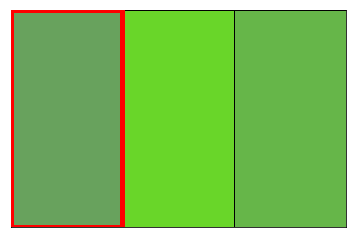

646 So I was contacting the requester as to what to do.


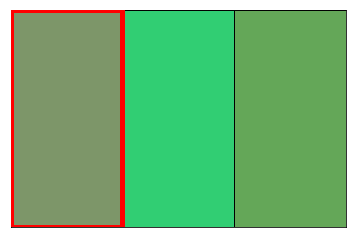

1306 Olive green.  Other two are orange and what i'll call darkish neon green (yellowish)


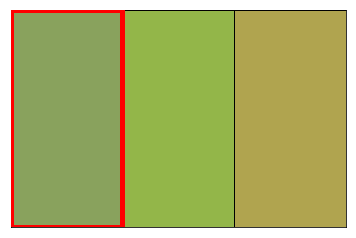

1485 I do not know what that is...


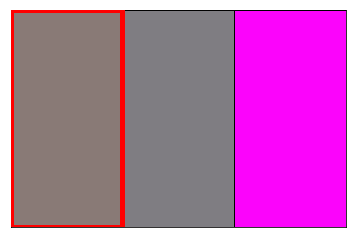

1940 Does it tell you what I picked?


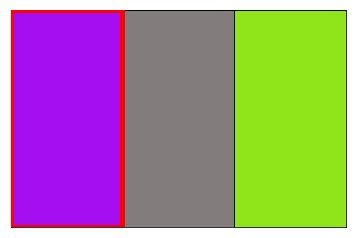

3040 I would go with turquoise green and lime - is that what you see?


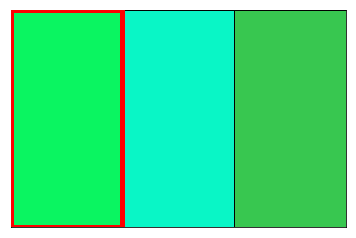

3056 the question is what do we qualify as each of those lol


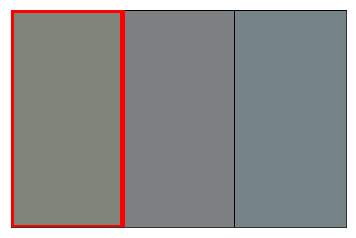

5296 i'm not quite sure what you mean by saturated


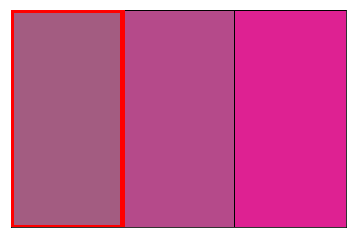

5488 choose a gray. let's see what happens


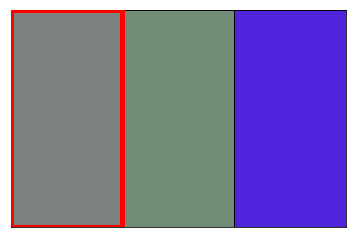

5713 Mixing blue and red together what color does it make


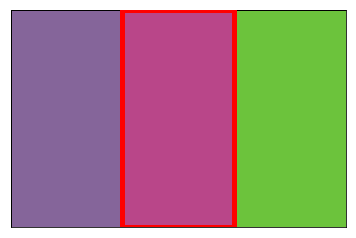

7526 I have what I would call gray, blue/gray and a green/light grass color


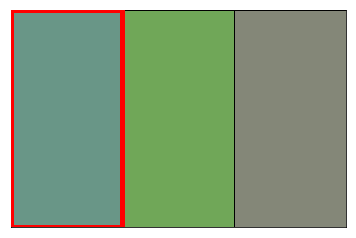

9029 what colors do you see?


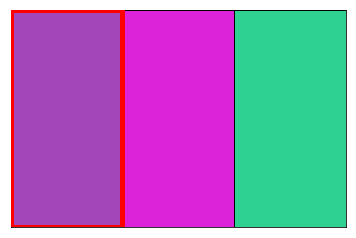

9226 what


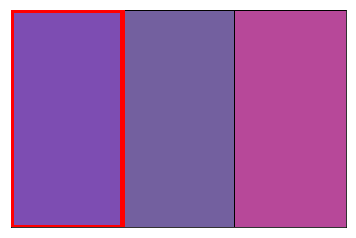

9227 the closet to what grimace looked like. A purple blue maybe


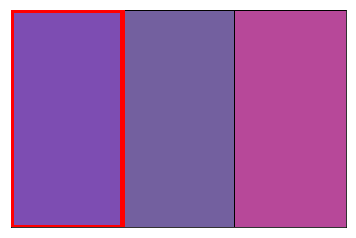

9286 what kind of flower?


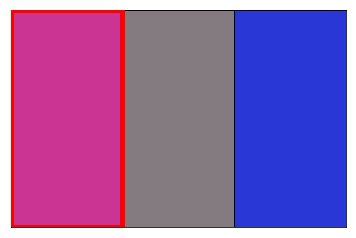

9364 not grey and not blue. Not sure what youd call it


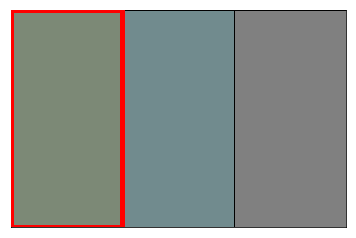

9823 what do the colors look like to u


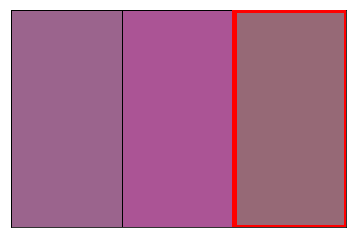

9826 o what


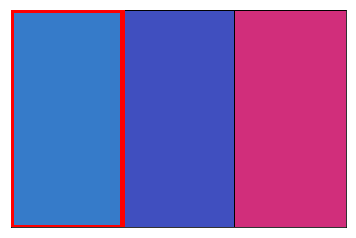

10270 I dont know what mauve is. It's like..purplish.


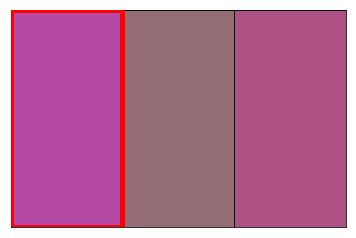

10319 what does qq mean?


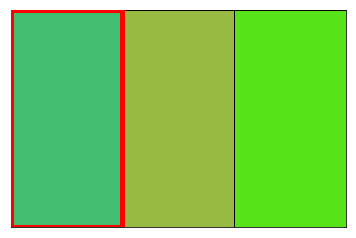

11874 most natural green, i'm not sure what to say about it


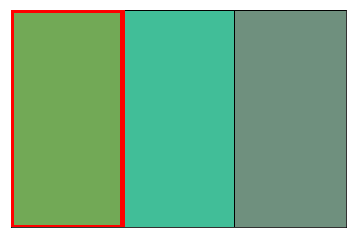

12514 what color?


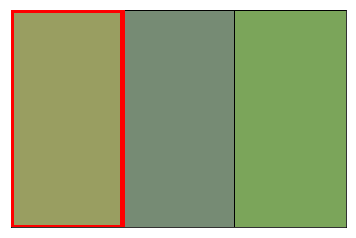

13138 what do you see


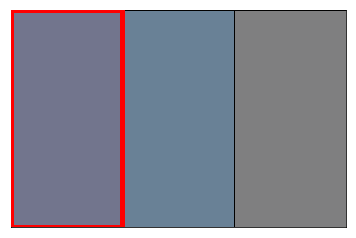

13203 what color


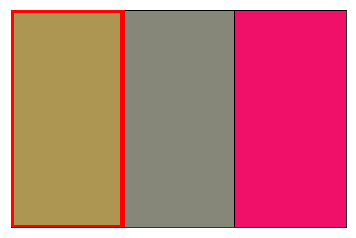

13317 what's normal?


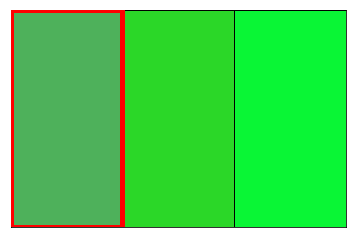

13470 I have no idea what parrot green is


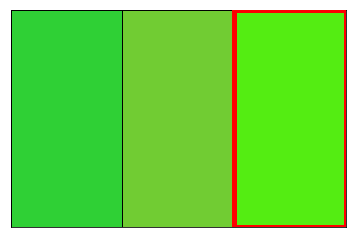

13744 i don't know what that is


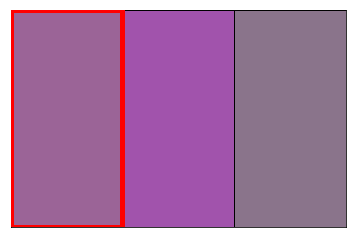

15218 what


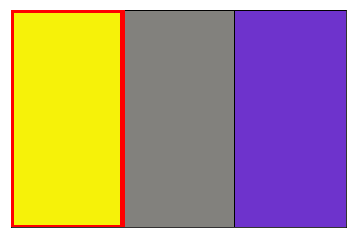

15718 what you mean?  i dont do forums anymore, just fb group :-)


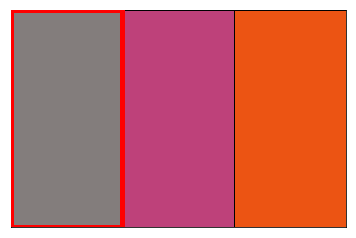

16710 why what happened


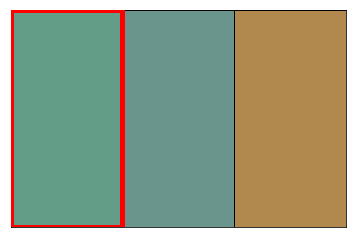

18531 i have no idea what that is


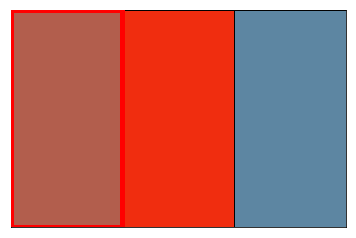

19277 oops didn't get what you meant on that


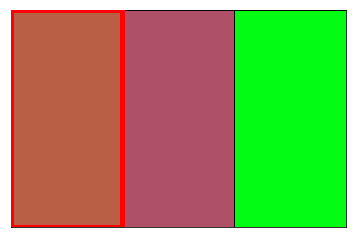

19358 pixels? what do you mean?


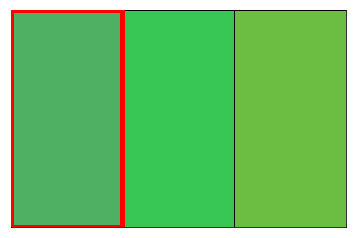

19392 is what I see


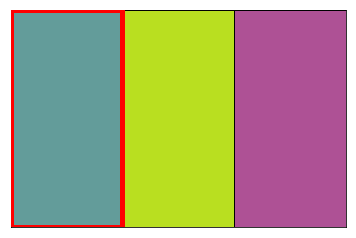

19698 the one that I don't know what colour it is?  not pink or yellow


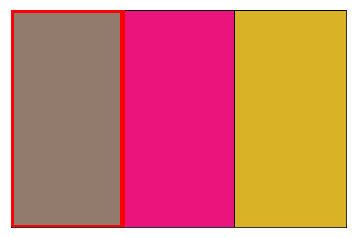

19832 not sure what pea green is


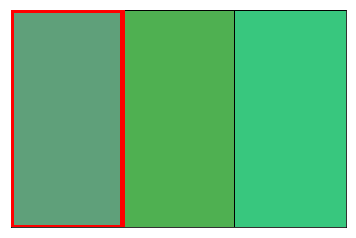

23445 what object am I clicking?


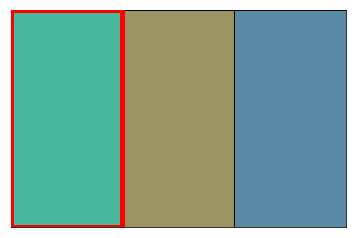

23904 Wait, no. I think what you're calling green/gray is what I was calling tan/grey


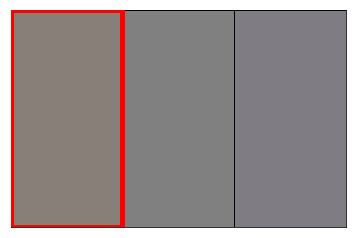

24248 the grass is what?


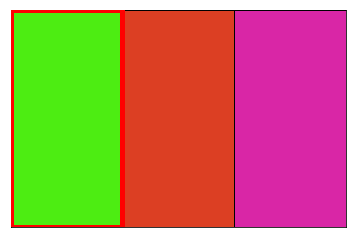

24249 the john deere tractor was painted what?


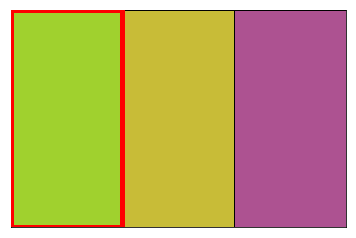

24251 The sky turned a dark what before it rained.


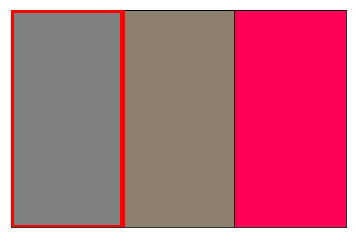

24385 what


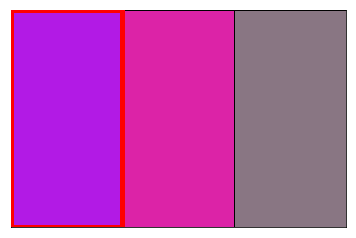

24522 no idea what you mean.


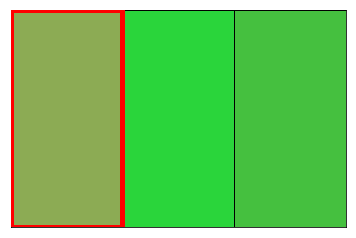

25979 ew what color is your stomach?


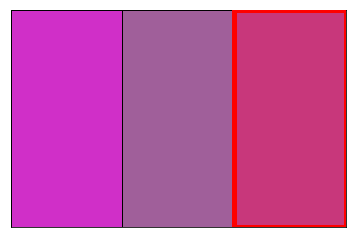

26102 sorry, must not no what aqua is :(


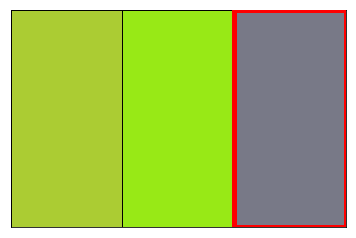

26900 yes thats what i was going to suggest


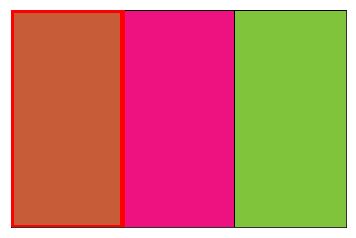

26924 i like it when you say NOT...then what it is


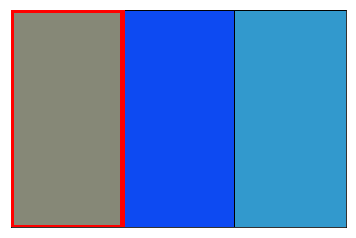

26927 sort of like process of elimination then what it is


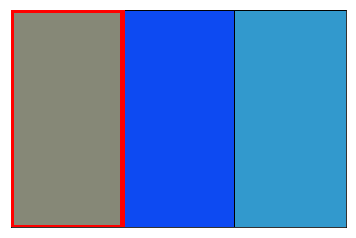

27287 i dont know what that means


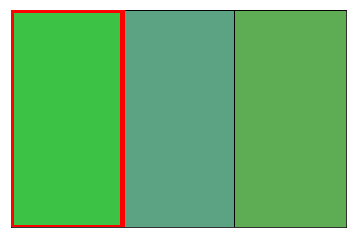

27380 what color is that...not the salmon one but the pinker one.


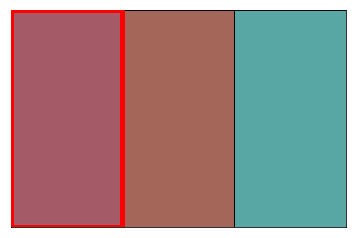

27600 what


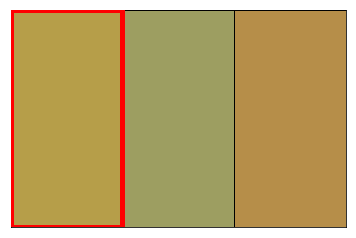

27945 what happened?


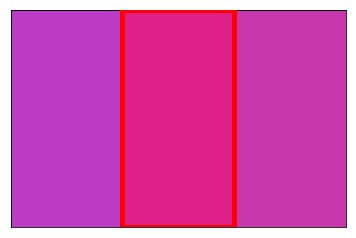

28037 haha this is like 10th time in a row im listener what the heck


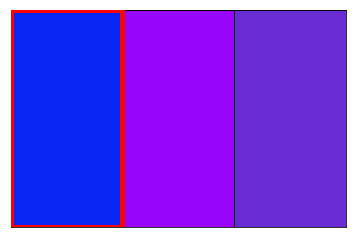

28434 what is your name?


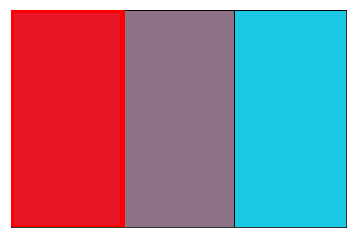

28945 turn what off?


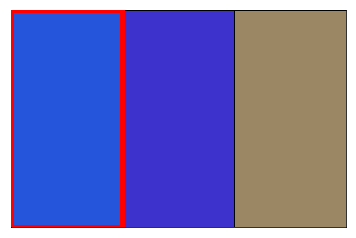

29029 here's what I see.  stomach entrails, hot pink leggings, and watermelon sherbet


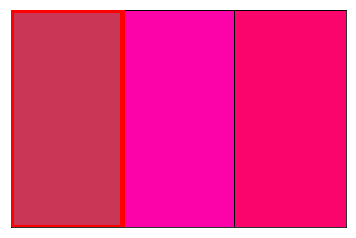

29281 what


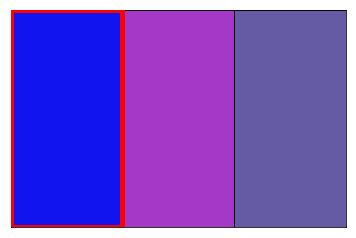

29481 what do the other two look like to you?


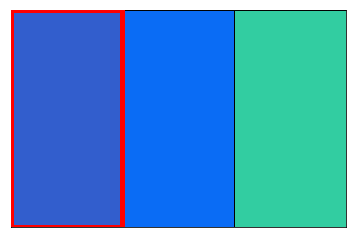

30125 please feel free to ask questions if youre not sure what i mean


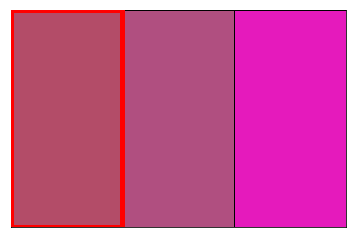

32670 what are you doing?


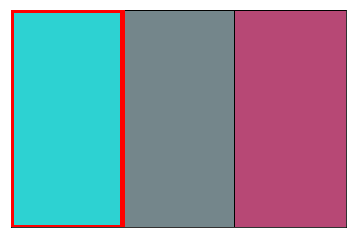

32684 what?


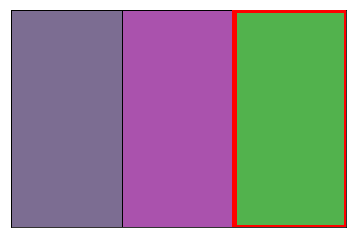

33338 the one that has what looks like a teal tint to it.


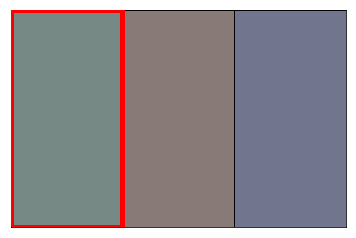

34304 I see what you meant. Apologies


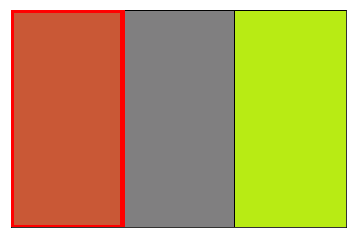

35241 guess what.  purpleish grey


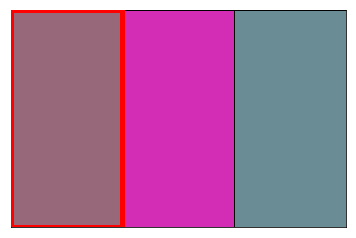

35596 what shade


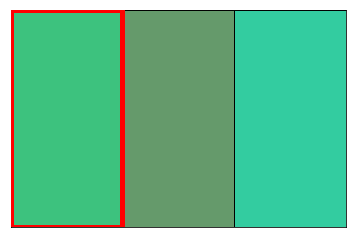

35644 what colors do you have


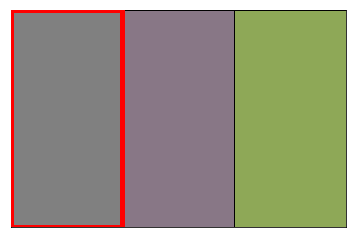

37490 what do you see?


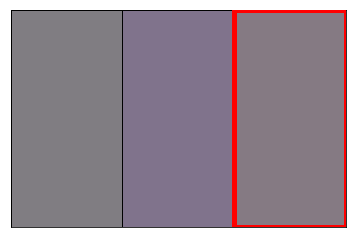

37518 just going to say what it's not because that works better


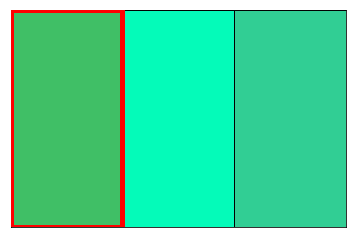

37742 grey/brown pruple, idk what that color even is anymore.


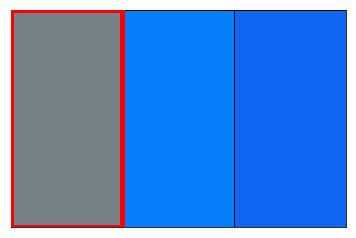

38827 grey, dull green or bright green is what i see


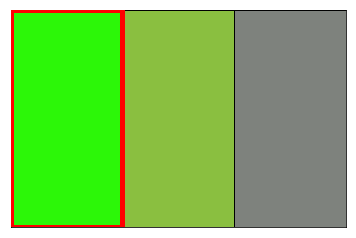

39309 what do you mean by darkest?


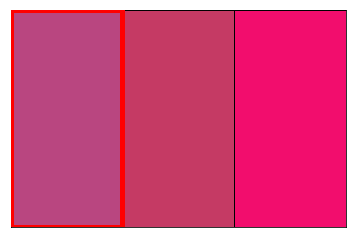

39461 what is your name?


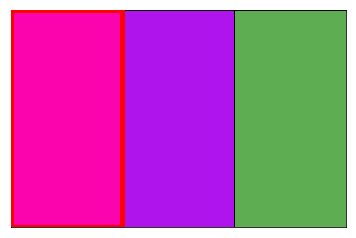

40333 yah what ever


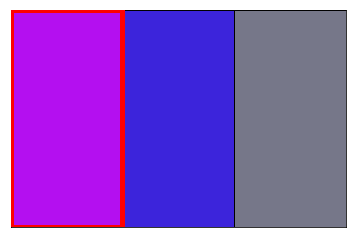

40864 not sure what that is


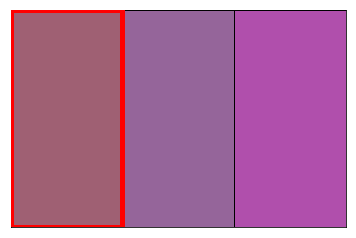

41452 what type of monitor are you using o.o


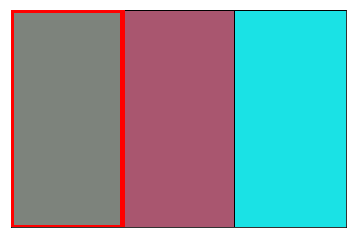

44015 that's what they look like to me


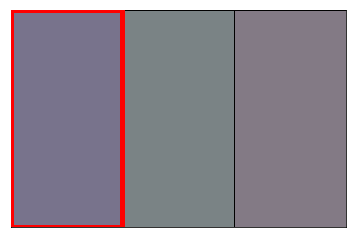

48128 so what about this one


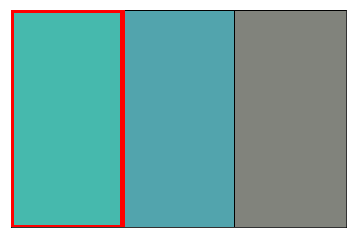

49337 don't know what oastel means. Sorry.


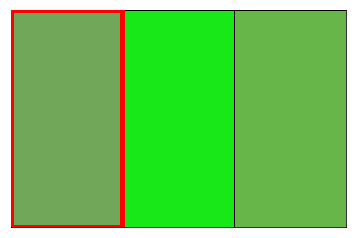

49340 On another round the speaker kept saying cauliflower... No clue what that was


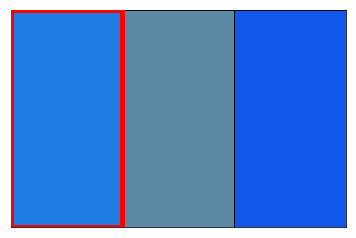

50190 not the brightest green; not what looks like olive


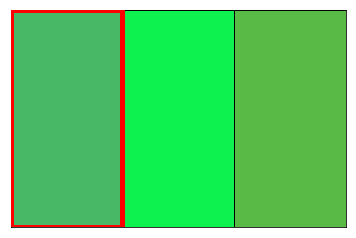

51048 what's the code word?


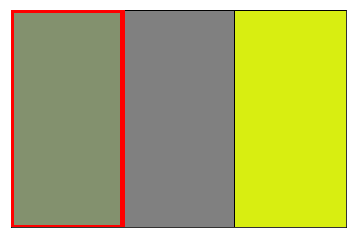

51966 I think that's what happens more often than not   different calibrations


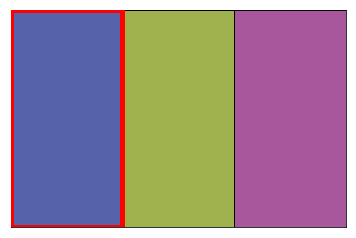

52434 what?


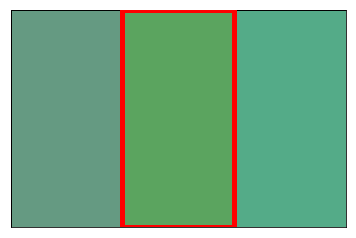

53500 what do you see?


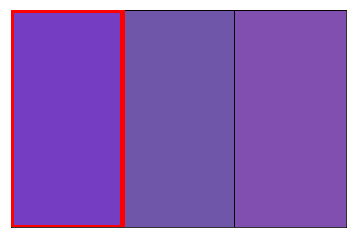

56404 lol what did I say


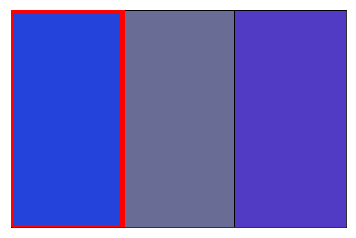

57578 we see them differently too kind of like what color is the dress


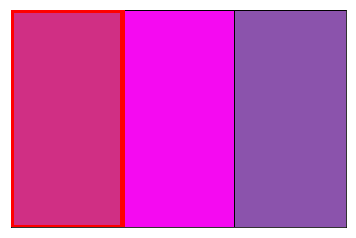

57724 i think we don't agree on what purple looks like haha


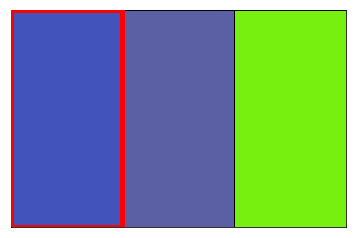

In [285]:
for i in weird_ones:
    md_test.display_game(i)


57722 i dont see purple


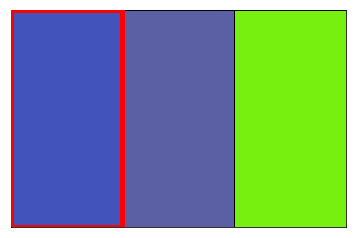

57723 i see light blue and blue


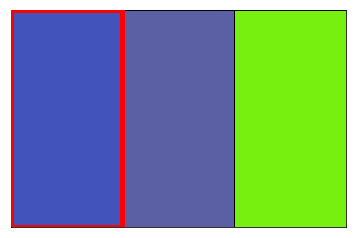

57724 i think we don't agree on what purple looks like haha


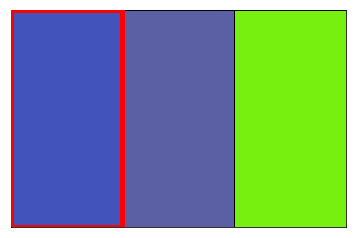

57725 agreed


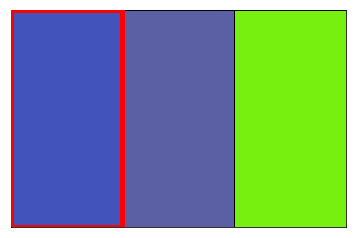

57726 it's our achilles heel


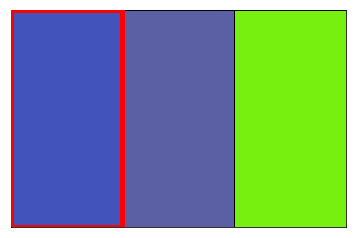

57727 i definitely don't see a light blue


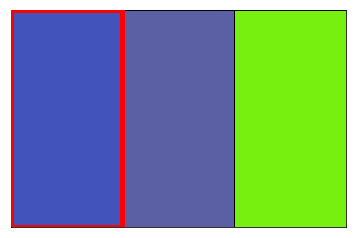

57728 how about not grey


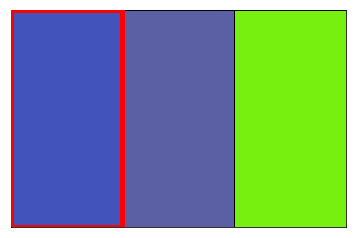

57729 the lighter of the two greens


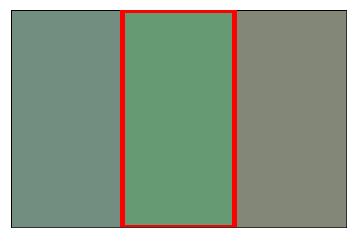

57730 grey/brown


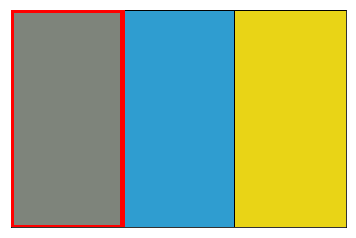

57731 pink. not red


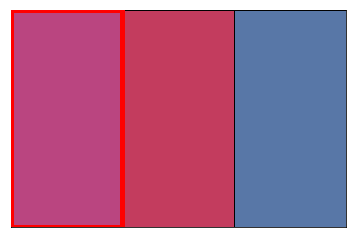

In [319]:
display_surrounding_games(57727, n=5)

In [305]:
def display_surrounding_games(game_idx, n=2):
    for i in range(game_idx-n, game_idx+n):
        md_test.display_game(i)

15185 light pink


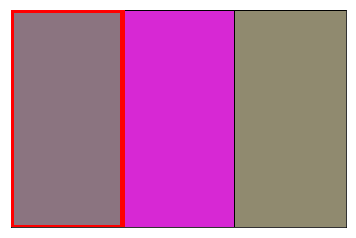

15186 dark sand


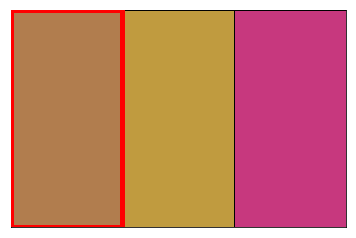

15187 idk


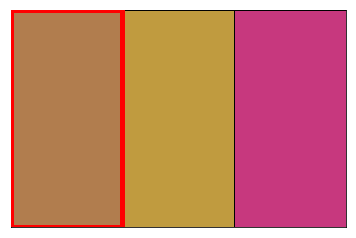

15188 blue


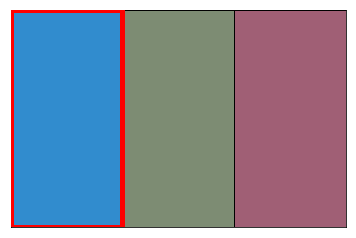

In [360]:
display_surrounding_games(15187, n=2)

In [326]:
len(md_test)

57946

In [331]:
# filter out all listeners
speaker_data = md_test.data[md_test.data["role"] == "speaker"]

In [351]:
speaker_data = md_test.data[md_test.data["role"] == "speaker"]
max_msg_times = speaker_data.groupby(['gameid', 'roundNum']).msgTime.transform(max)

In [357]:
speaker_data = md_test.data[md_test.data["role"] == "speaker"]
max_msg_times = speaker_data.groupby(['gameid', 'roundNum']).msgTime.transform(max)
speaker_data = speaker_data.loc[max_msg_times == speaker_data.msgTime]

In [358]:
speaker_data.shape

(46994, 36)

In [333]:
speaker_data.groupby(['gameid', 'roundNum']).ngroups

46994

In [374]:
speaker_data[(speaker_data["gameid"]=="4793-9") & (speaker_data["roundNum"]==38)].index.values

array([15222])

In [373]:
md_test.data[(md_test.data["gameid"]=="4793-9") & (md_test.data["roundNum"]==38)].index.values

array([15220, 15221, 15222])

In [363]:
nltk.word_tokenize("uh, grey green?")

['uh', ',', 'grey', 'green', '?']

In [346]:
np.argmax(md_test.data[15173:15175].msgTime)#.transform(max)

15174

In [349]:
max(md_test.data[15173:15175].msgTime)

1476483980681.0

In [350]:
min(md_test.data[15173:15175].msgTime)

1476483971337.0

15205 oh man


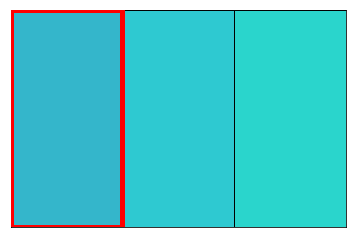

In [338]:
md_test.display_game(15205)

In [325]:
md_test.data[15217:15225].T

,15217,15218,15219,15220,15221,15222,15223,15224
gameid,4793-9,4793-9,4793-9,4793-9,4793-9,4793-9,4793-9,4793-9
clkTime,1.47648e+12,1.47648e+12,1.47648e+12,1.47648e+12,1.47648e+12,1.47648e+12,1.47648e+12,1.47648e+12
roundNum,37,37,37,38,38,38,39,40
condition,far,far,far,far,far,far,far,close
clickStatus,target,target,target,target,target,target,target,target
clickColH,59,59,59,352,352,352,194,116
clickColS,93,93,93,30,30,30,86,38
clickColL,50,50,50,50,50,50,50,50
clickLocS,2,2,2,3,3,3,3,1
clickLocL,1,1,1,2,2,2,2,2


[108 16 50] [78 99 50] [153 12 50]
8 Camo green


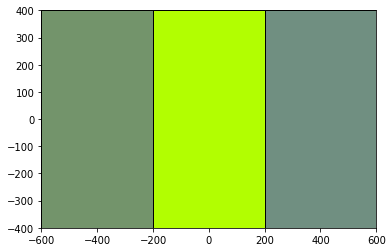

In [244]:


def hls_to_rgb(color):
    norm_circle = cols.Normalize(0, 360)
    norm_hundred = cols.Normalize(0, 100)
    norm_col = [norm_circle(color[0]), norm_hundred(color[1]), norm_hundred(color[2])]
    return cs.hls_to_rgb(norm_col[0], norm_col[2], norm_col[1])


#c1 = [179, 50, 65]
for i in range(8, 9):
    color_arr = np.array(colors.loc[i,]);
    
    c1 = color_arr[0:3]
    c2 = color_arr[3:6]
    c3 = color_arr[6:9]
    #c2 = np.array(colors.loc[i,])
    print(c1, c2, c3)
    fig = plt.figure()
    ax = fig.add_subplot(111)

    rect1 = matplotlib.patches.Rectangle((-600,-400), 400, 800, facecolor=hls_to_rgb(c1), edgecolor="black")
    rect2 = matplotlib.patches.Rectangle((-200,-400), 400, 800, facecolor=hls_to_rgb(c2), edgecolor="black")
    rect3 = matplotlib.patches.Rectangle((200,-400), 400, 800, facecolor=hls_to_rgb(c3), edgecolor="black")

    ax.add_patch(rect1)
    ax.add_patch(rect2)
    ax.add_patch(rect3)
    print(i, color_arr[9])
    plt.xlim([-600, 600])
    plt.ylim([-400, 400])
    plt.show()

In [150]:
dev_df[dev_df.contents=="drab green not the bluer one"]

,gameid,clkTime,roundNum,condition,clickStatus,clickColH,clickColS,clickColL,clickLocS,clickLocL,...,msgTime,role,contents,workerid_uniq,numOutcome,numRawWords,numRawChars,numCleanChars,numCleanWords,source
3014,0109-c,1.4765e+12,33,split,target,155,11,50,2,2,...,1.4765e+12,speaker,drab green not the bluer one,232,1,6,23,17,4,human
